<a href="https://colab.research.google.com/github/nattapon44/dpdm/blob/main/quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **633020371-2 ณัฐพล สุรศิลป์**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_19_clean_complete.csv')
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


- ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง? ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)


In [4]:
covid.shape

(49068, 10)

In [5]:
covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [8]:
covid['Date']=pd.to_datetime(covid['Date'],dayfirst=True)
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [9]:
min(covid['Date'])

Timestamp('2020-01-22 00:00:00')

In [10]:
max(covid['Date'])

Timestamp('2020-07-27 00:00:00')

- สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่

In [11]:
covid.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

- ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [12]:
covid.groupby(["WHO Region"])[['Confirmed']].mean().sort_values(by=['Confirmed'],ascending=False)

,Confirmed
WHO Region,
Americas,46514.939177
South-East Asia,29318.279255
Eastern Mediterranean,17911.724371
Europe,16547.858577
Western Pacific,2550.716731
Africa,2414.874446


In [13]:
covid.loc[covid["Confirmed"].idxmax()]["WHO Region"]

'Americas'

- ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [14]:
covid.groupby(["WHO Region"])[['Recovered']].mean().sort_values(by=['Recovered'],ascending=False)

,Recovered
WHO Region,
Americas,18162.516651
South-East Asia,15973.578191
Eastern Mediterranean,11617.674807
Europe,8191.627327
Western Pacific,1824.173114
Africa,1240.439938


In [15]:
covid.loc[covid["Recovered"].idxmax()]["WHO Region"]

'Americas'

- ทวีปไหนมีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [16]:
covid.groupby(["WHO Region"])[['Deaths']].mean().sort_values(by=['Deaths'],ascending=False)

,Deaths
WHO Region,
Americas,2238.586031
Europe,1281.319149
South-East Asia,775.603191
Eastern Mediterranean,465.190764
Western Pacific,90.176983
Africa,48.756427


In [17]:
covid.loc[covid["Deaths"].idxmax()]["WHO Region"]

'Americas'

- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='WHO Region'>

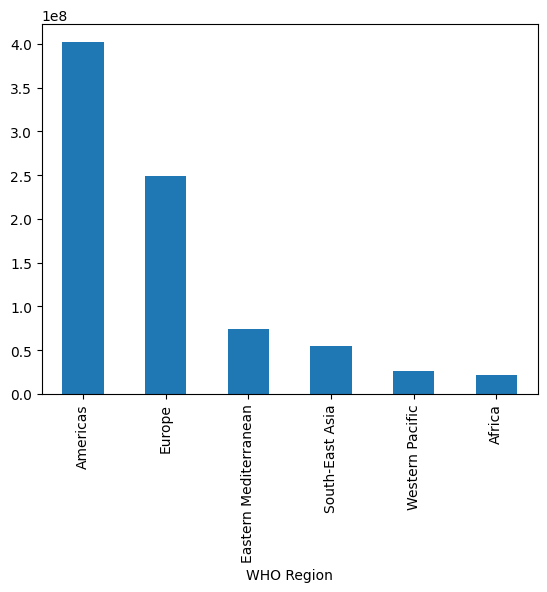

In [18]:
import matplotlib.pyplot as plt
covid.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False).plot.bar()

<Axes: xlabel='WHO Region'>

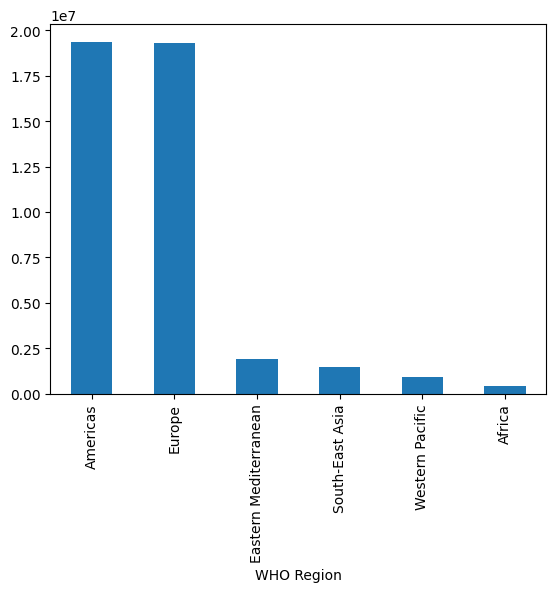

In [19]:
covid.groupby("WHO Region")["Deaths"].sum().sort_values(ascending=False).plot.bar()

<Axes: xlabel='WHO Region'>

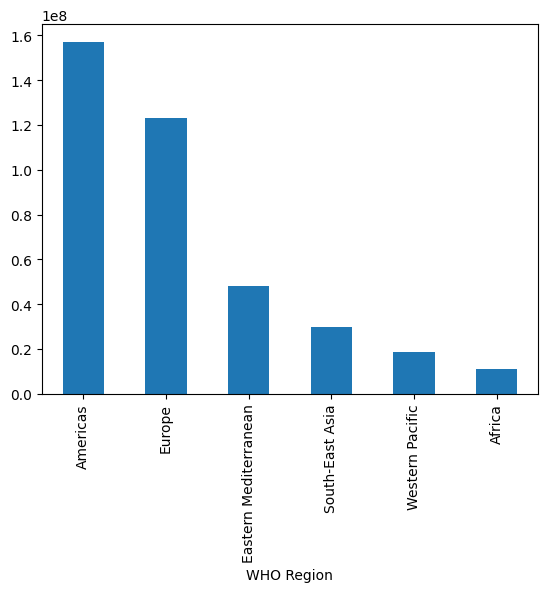

In [20]:
covid.groupby("WHO Region")["Recovered"].sum().sort_values(ascending=False).plot.bar()

- ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [21]:
country_con = covid.groupby(["Country/Region"])[['Confirmed']].sum().sort_values(by=['Confirmed'],ascending=False)
country_con

,Confirmed
Country/Region,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045
...,...
Saint Kitts and Nevis,1772
Greenland,1507
Holy See,1356


In [22]:
covid.loc[covid["Confirmed"].idxmax()]["Country/Region"]

'US'

- ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [23]:
country_deaths = covid.groupby(["Country/Region"])[['Deaths']].sum().sort_values(by=['Deaths'],ascending=False)
country_deaths

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
...,...
Bhutan,0
Mongolia,0
Timor-Leste,0


In [24]:
covid.loc[covid["Deaths"].idxmax()]["Country/Region"]

'US'

- ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [25]:
country_re = covid.groupby(["Country/Region"])[['Recovered']].sum().sort_values(by=['Recovered'],ascending=False)
country_re

,Recovered
Country/Region,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
...,...
Timor-Leste,0
Mozambique,0
Syria,0


In [26]:
covid.loc[covid["Recovered"].idxmax()]["Country/Region"]

'Brazil'

- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='Country/Region'>

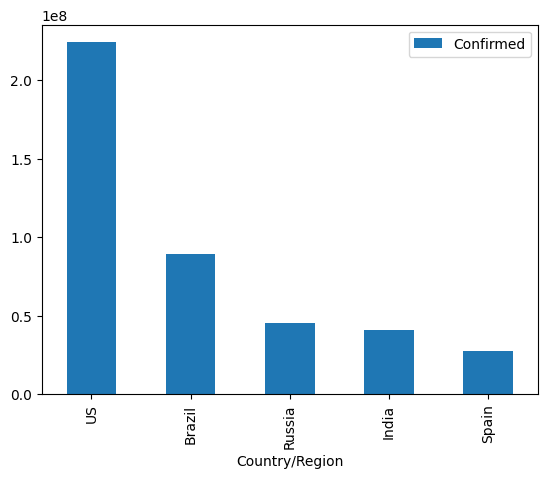

In [27]:
country_con.head().plot.bar()

<Axes: xlabel='Country/Region'>

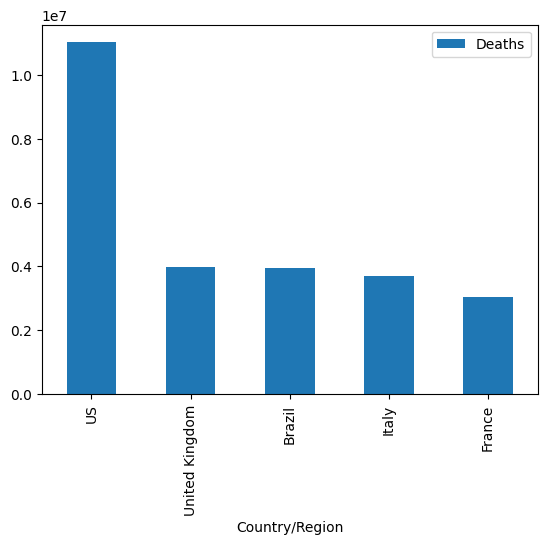

In [28]:
country_deaths.head().plot.bar()

<Axes: xlabel='Country/Region'>

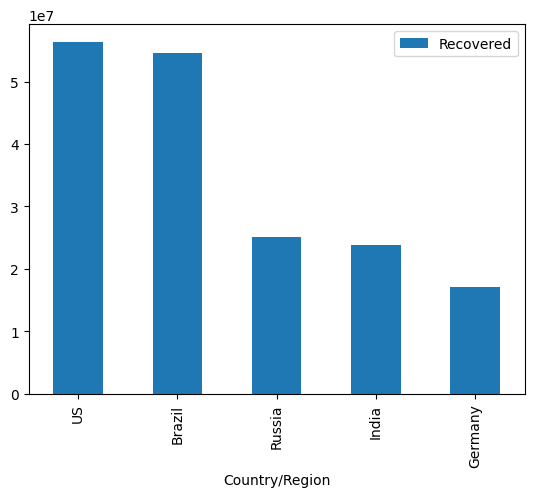

In [29]:
country_re.head().plot.bar()

- สรุปข้อมูลโควิดประจำวันของประเทศไทย

In [30]:
covid[(covid['Country/Region']=='Thailand')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


In [31]:
covid[(covid['Country/Region']=='Thailand')].describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000
mean,1.587003e+01,1.009925e+02,1949.611702,33.452128,1661.489362,254.670213
std,3.562200e-15,1.424880e-14,1388.252687,26.313268,1378.750684,408.483772
min,1.587003e+01,1.009925e+02,2.000000,0.000000,0.000000,2.000000
25%,1.587003e+01,1.009925e+02,50.000000,1.000000,31.000000,22.750000
50%,1.587003e+01,1.009925e+02,2907.000000,51.000000,2547.000000,78.000000
75%,1.587003e+01,1.009925e+02,3125.000000,58.000000,2982.500000,177.000000
max,1.587003e+01,1.009925e+02,3297.000000,58.000000,3111.000000,1451.000000


- สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์

In [32]:
th_before_songkran = covid[(covid['Date']>=datetime(day=6,month=4,year=2020)) & (covid['Date']<=datetime(day=12,month=4,year=2020))][covid["Country/Region"]=='Thailand']
th_before_songkran

<ipython-input-32-83d31afe8094>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  th_before_songkran = covid[(covid['Date']>=datetime(day=6,month=4,year=2020)) & (covid['Date']<=datetime(day=12,month=4,year=2020))][covid["Country/Region"]=='Thailand']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
19782,NaN,Thailand,15.870032,100.992541,2020-04-06,2220,26,793,1401,South-East Asia
20043,NaN,Thailand,15.870032,100.992541,2020-04-07,2258,27,888,1343,South-East Asia
20304,NaN,Thailand,15.870032,100.992541,2020-04-08,2369,30,888,1451,South-East Asia
20565,NaN,Thailand,15.870032,100.992541,2020-04-09,2423,32,940,1451,South-East Asia
20826,NaN,Thailand,15.870032,100.992541,2020-04-10,2473,33,1013,1427,South-East Asia
21087,NaN,Thailand,15.870032,100.992541,2020-04-11,2518,35,1135,1348,South-East Asia
21348,NaN,Thailand,15.870032,100.992541,2020-04-12,2551,38,1218,1295,South-East Asia


In [33]:
th_before_songkran.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.587003e+01,1.009925e+02,2401.714286,31.571429,982.142857,1388.000000
std,1.918685e-15,1.534948e-14,126.548692,4.276180,150.123758,60.417988
min,1.587003e+01,1.009925e+02,2220.000000,26.000000,793.000000,1295.000000
25%,1.587003e+01,1.009925e+02,2313.500000,28.500000,888.000000,1345.500000
50%,1.587003e+01,1.009925e+02,2423.000000,32.000000,940.000000,1401.000000
75%,1.587003e+01,1.009925e+02,2495.500000,34.000000,1074.000000,1439.000000
max,1.587003e+01,1.009925e+02,2551.000000,38.000000,1218.000000,1451.000000


In [34]:
th_while_songkran = covid[(covid['Date']>=datetime(day=13,month=4,year=2020)) & (covid['Date']<=datetime(day=18,month=4,year=2020))][covid["Country/Region"]=='Thailand']
th_while_songkran

<ipython-input-34-ea9e6cde3511>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  th_while_songkran = covid[(covid['Date']>=datetime(day=13,month=4,year=2020)) & (covid['Date']<=datetime(day=18,month=4,year=2020))][covid["Country/Region"]=='Thailand']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
21609,NaN,Thailand,15.870032,100.992541,2020-04-13,2579,40,1288,1251,South-East Asia
21870,NaN,Thailand,15.870032,100.992541,2020-04-14,2613,41,1405,1167,South-East Asia
22131,NaN,Thailand,15.870032,100.992541,2020-04-15,2643,43,1497,1103,South-East Asia
22392,NaN,Thailand,15.870032,100.992541,2020-04-16,2672,46,1593,1033,South-East Asia
22653,NaN,Thailand,15.870032,100.992541,2020-04-17,2700,47,1689,964,South-East Asia
22914,NaN,Thailand,15.870032,100.992541,2020-04-18,2733,47,1787,899,South-East Asia


In [36]:
th_while_songkran.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,15.870032,100.992541,2656.666667,44.000000,1543.166667,1069.500000
std,0.000000,0.000000,56.683919,3.098387,184.139530,130.463405
min,15.870032,100.992541,2579.000000,40.000000,1288.000000,899.000000
25%,15.870032,100.992541,2620.500000,41.500000,1428.000000,981.250000
50%,15.870032,100.992541,2657.500000,44.500000,1545.000000,1068.000000
75%,15.870032,100.992541,2693.000000,46.750000,1665.000000,1151.000000
max,15.870032,100.992541,2733.000000,47.000000,1787.000000,1251.000000


In [35]:
th_after_songkran = covid[(covid['Date']>=datetime(day=19,month=4,year=2020)) & (covid['Date']<=datetime(day=25,month=4,year=2020))][covid["Country/Region"]=='Thailand']
th_after_songkran

<ipython-input-35-123e1f803855>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  th_after_songkran = covid[(covid['Date']>=datetime(day=19,month=4,year=2020)) & (covid['Date']<=datetime(day=25,month=4,year=2020))][covid["Country/Region"]=='Thailand']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
23175,NaN,Thailand,15.870032,100.992541,2020-04-19,2765,47,1928,790,South-East Asia
23436,NaN,Thailand,15.870032,100.992541,2020-04-20,2792,47,1999,746,South-East Asia
23697,NaN,Thailand,15.870032,100.992541,2020-04-21,2811,48,2108,655,South-East Asia
23958,NaN,Thailand,15.870032,100.992541,2020-04-22,2826,49,2352,425,South-East Asia
24219,NaN,Thailand,15.870032,100.992541,2020-04-23,2839,50,2430,359,South-East Asia
24480,NaN,Thailand,15.870032,100.992541,2020-04-24,2907,51,2547,309,South-East Asia
24741,NaN,Thailand,15.870032,100.992541,2020-04-25,2907,51,2547,309,South-East Asia


In [37]:
th_after_songkran.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.587003e+01,1.009925e+02,2835.285714,49.000000,2273.000000,513.285714
std,1.918685e-15,1.534948e-14,54.450939,1.732051,258.962031,210.504722
min,1.587003e+01,1.009925e+02,2765.000000,47.000000,1928.000000,309.000000
25%,1.587003e+01,1.009925e+02,2801.500000,47.500000,2053.500000,334.000000
50%,1.587003e+01,1.009925e+02,2826.000000,49.000000,2352.000000,425.000000
75%,1.587003e+01,1.009925e+02,2873.000000,50.500000,2488.500000,700.500000
max,1.587003e+01,1.009925e+02,2907.000000,51.000000,2547.000000,790.000000


จากข้อมูลข้างต้นสามารถสรุปได้ว่า
- ผู้ติดโควิดเฉลี่ยก่อนสงกรานต์เท่ากับ 2402 คน
- ผู้ติดโควิดเฉลี่ยในช่วงสงกรานต์เท่ากับ 2567 คน
- ผู้ติดโควิดเฉลี่ยหลังสงกรานต์เท่ากับ 2835 คน

แสดงว่ายอดผู้ป่วยโควิดหลังเทศกาลสงกรานต์มียอดผู้ป่วยเพิ่มขึ้น 433 คน  